In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Clustering 2D Data using K-Means

### Read Data

<p class="question"><span class="Q">Q1.</span> First, you need to import the data, import the file <code>./datasets/02-KMeans-Data.csv</code> using pandas:</p>

In [3]:
df = pd.read_csv('02-KMeans-Data.csv')

In [4]:
df.head(n=10)

,X,Y
0,-0.117287,-0.055312
1,0.276792,-0.620654
2,-0.863127,1.623270
3,1.796885,-0.979010
4,-0.862370,2.462756
5,1.902705,1.346105
6,-1.162568,2.170213
7,-0.730291,1.971274
8,2.059960,1.819427
9,-0.854292,-0.421991


### Plot Data

<p class="question"><span class="Q">Q2.</span> Draw a scatter plot of the X and Y coordinates</p>

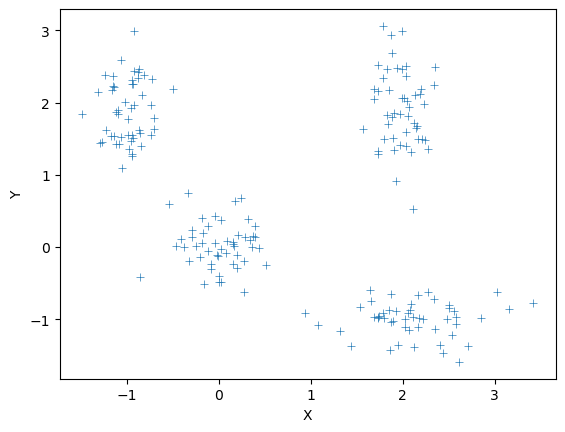

In [5]:
sns.scatterplot(x=df['X'], y=df['Y'], marker='+');

The plot shows that the data can be clustered into 4 clusters

## 2. Applying K-means on 2D Data

### Import kmeans from sklearn library

In [5]:
from sklearn.cluster import KMeans

### Call KMeans functions and fit it to the dataset

In [6]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df);

The result is an object that holds the final result after running KMeans algorithm

You can check the final labels, the labels order 

In [7]:
kmeans.labels_

array([1, 1, 0, 3, 0, 2, 0, 0, 2, 1, 1, 3, 0, 3, 2, 1, 3, 2, 3, 2, 0, 1,
       3, 1, 1, 3, 0, 3, 3, 2, 1, 0, 3, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1,
       0, 1, 3, 1, 2, 2, 1, 2, 0, 3, 3, 0, 0, 0, 1, 3, 0, 1, 2, 3, 2, 2,
       2, 3, 3, 2, 0, 2, 2, 0, 3, 2, 2, 0, 2, 2, 3, 0, 3, 2, 3, 0, 2, 1,
       2, 2, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 2, 1, 0, 2, 2, 1,
       0, 1, 0, 2, 3, 1, 3, 1, 1, 0, 1, 2, 0, 3, 3, 3, 1, 1, 2, 1, 0, 0,
       3, 0, 2, 2, 0, 2, 0, 1, 1, 0, 1, 0, 0, 3, 1, 2, 3, 0, 0, 1, 2, 1,
       2, 2, 0, 0, 1, 3, 1, 3, 1, 2, 0, 3, 1, 1, 2, 1, 2, 2, 3, 2, 0, 0,
       3, 0, 1, 3, 2, 3, 3, 2, 2, 2, 0, 3, 1, 1, 1, 2, 1, 1, 0, 0, 3, 2,
       3, 2])

In [8]:
kmeans.cluster_centers_ # klaszterek átlagolása

array([[-0.98932776,  1.88713393],
       [ 0.00773264,  0.02426377],
       [ 1.97950346,  1.92236198],
       [ 2.11820731, -1.00033881]])

<p class="question"><span class="Q">Q3.</span> Plot the points again, but this time each different cluster should have a different color</p>

In [10]:
def plot_result(kmeans):
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df['X'], y=df['Y'], hue=kmeans.labels_, palette="Set1", marker='+');
    sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], marker='o', s=100, c=['black']);

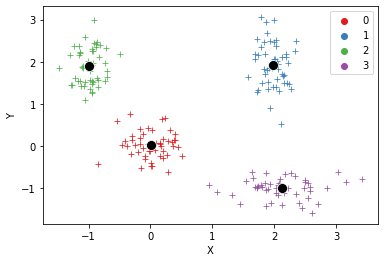

In [11]:
plot_result(kmeans)

<p class="question"><span class="Q">Q4.</span> Edit the previous function <code>plot_result(kmeans)</code> so that the centers of the clusters appear on the same plot</p>

You can predict new data by calling `kmeans.predict` function, and passing an array of 2D points

In [12]:
points = [
    [0,0],
    [1,0],
    [2,0]
]

kmeans.predict(points)

array([0, 0, 3])

<p class="question"><span class="Q">Q5.</span> Try to fit K-Means for <code>n_clusters</code> varying from 1 to 10, and plot all the results using previous <code>plot_result</code> function<p>

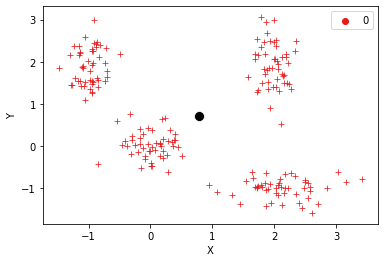

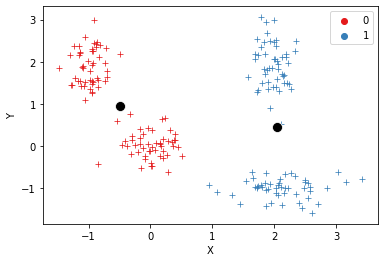

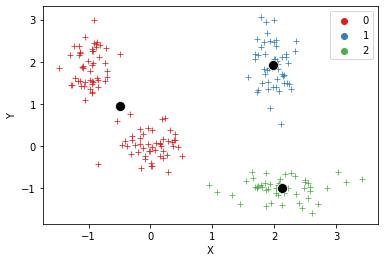

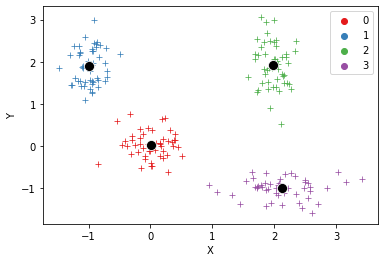

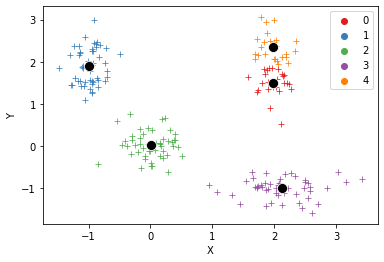

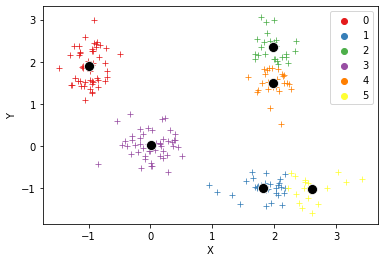

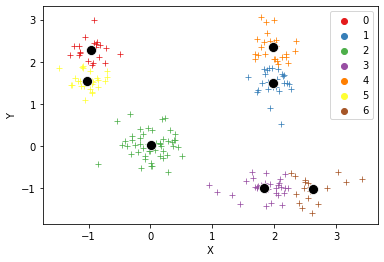

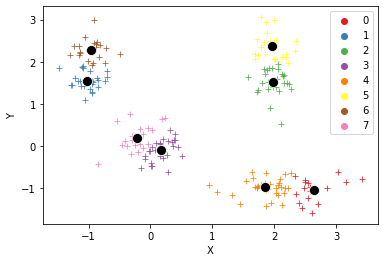

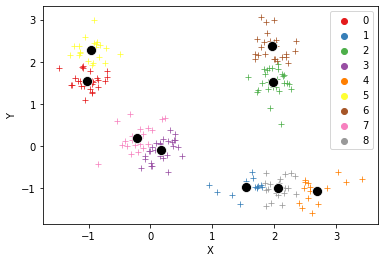

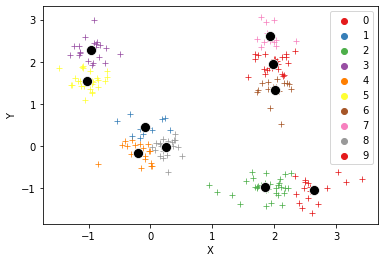

In [13]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    plot_result(kmeans)

## 3. Applying K-means on 3D Data

### Importing the data

<p class="question"><span class="Q">Q6.</span> Import the file <code>./datasets/02-KMeans-Data-3D.csv</code> using pandas:</p>

In [9]:
df3d = pd.read_csv('./datasets/02-KMeans-Data-3D.csv')

In [10]:
df3d.head(n=10)

,X,Y,Z
0,-2.183849,3.616875,3.601810
1,-1.909872,4.108371,4.275828
2,3.915184,4.272441,3.116261
3,-1.823565,4.207372,3.637610
4,-0.236434,0.099676,-0.144827
5,-2.198477,4.645310,4.021086
6,4.030326,4.199574,3.516007
7,4.330544,3.592972,3.522079
8,-1.784999,4.274897,3.950035
9,-0.582043,-0.431458,0.354925


### Plotting the points using 3D Axis

In [16]:
from mpl_toolkits.mplot3d import Axes3D

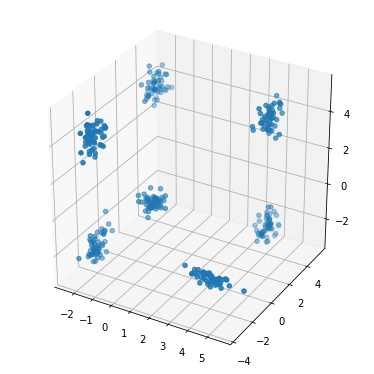

In [17]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)
ax.scatter3D(df3d.loc[:,'X'],df3d.loc[:,'Y'],df3d.loc[:,'Z']);

<p class="question"><span class="Q">Q7.</span> Apply K-Means for <b>5</b> cluster</p>

In [18]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df3d);

Let's see the results:

In [19]:
print(kmeans.cluster_centers_)

[[ 3.99688645  4.02452132 -2.10337226]
 [ 0.64207156 -1.31567861 -1.40422826]
 [ 4.01115047  4.01892812  3.92996188]
 [-1.99603539  3.99548542  4.01428277]
 [-2.00421497 -2.03833122  3.89223659]]


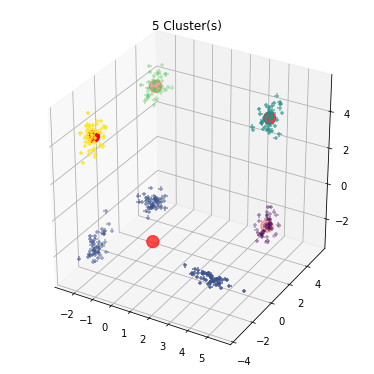

In [20]:
def plot_result_3d(kmeans):
    fig = plt.figure(figsize=(5, 5))
    ax = Axes3D(fig)
    ax.scatter3D(df3d.loc[:,'X'],df3d.loc[:,'Y'],df3d.loc[:,'Z'], c=kmeans.labels_, marker='+');
    ax.scatter3D(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],c=['red'],s=150);
    ax.set_title(str(kmeans.n_clusters) + ' Cluster(s)')
plot_result_3d(kmeans)

<p class="question"><span class="Q">Q8.</span> Try to fit K-Means for <code>n_culsters</code> varying from 1 to 10, and plot all the results using previous <code>plot_result_3d</code> function<p>

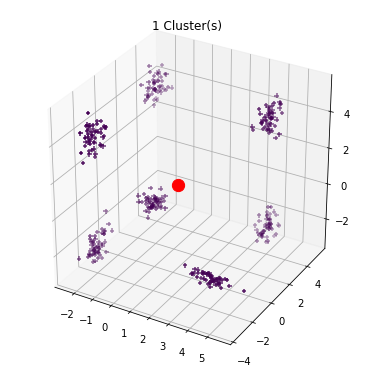

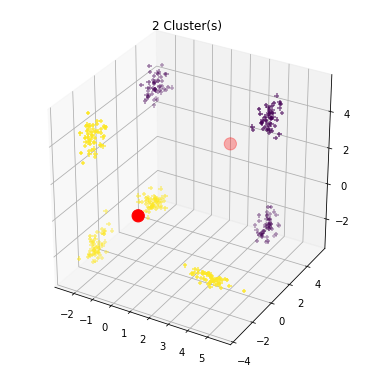

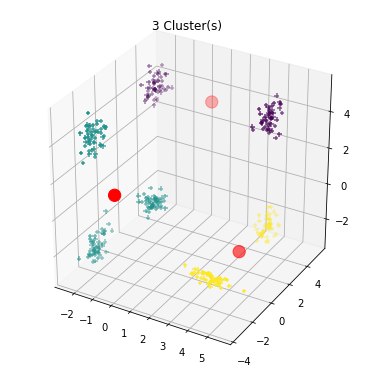

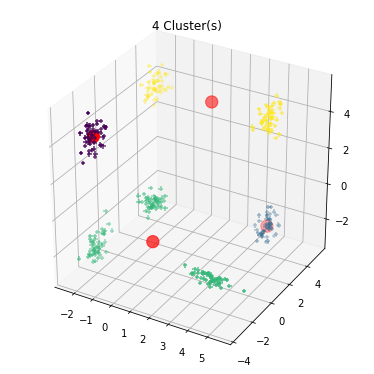

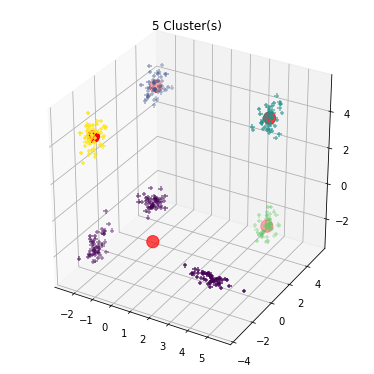

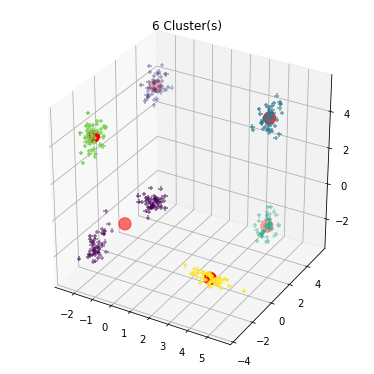

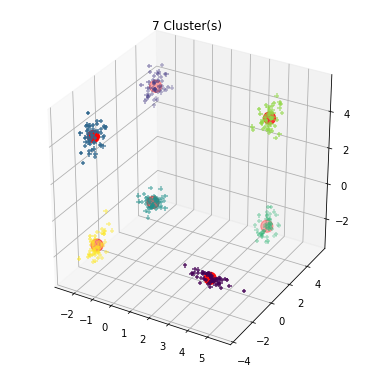

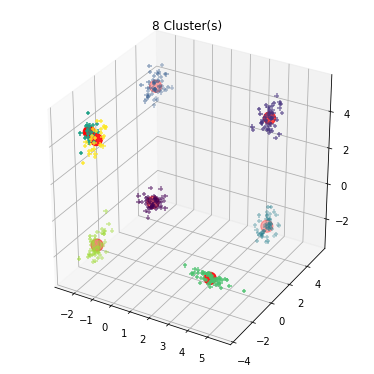

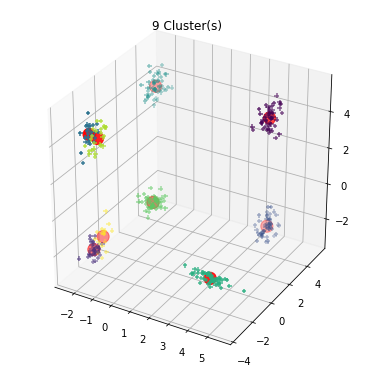

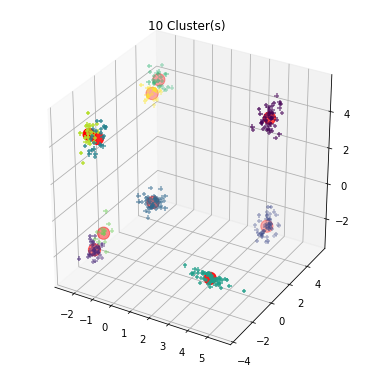

In [21]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df3d)
    plot_result_3d(kmeans)

<p class="question"><span class="Q">Q9.</span> Repeat the previous for loop, but instead of plotting the result, store the Sum of squared distances error for each <code>n_clusters</code> parameter in an array, and print it<p>

In [22]:
err = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df3d)
    err.append([kmeans.n_clusters, kmeans.inertia_])

err = np.asarray(err)
print(err)

[[1.00000000e+00 8.42922914e+03]
 [2.00000000e+00 5.12441433e+03]
 [3.00000000e+00 3.16529904e+03]
 [4.00000000e+00 2.26198698e+03]
 [5.00000000e+00 1.35963844e+03]
 [6.00000000e+00 4.67308750e+02]
 [7.00000000e+00 1.67151083e+02]
 [8.00000000e+00 1.53620317e+02]
 [9.00000000e+00 1.41754444e+02]
 [1.00000000e+01 1.34672865e+02]]


<p class="question"><span class="Q">Q10.</span>Plot the result and determine the best number of clusters using the elbow method<p>

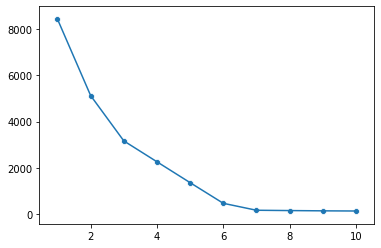

In [23]:
sns.lineplot(err[:,0], err[:,1])
sns.scatterplot(err[:,0], err[:,1])